<h1>Python Project – 1: Analyzing Naming Trends using Python</h1>
<h2>Project: Analyzing the naming trends using Python</h2>
<h3><p>Industry: General
Problem Statement:
The dataset is in Zipped format, we have to extract the dataset in the program, visualize the number of
male and female babies born in a particular year, and find out popular baby names.
Description: This project not only focusses on implementing data manipulation and data visualization
using Pandas library, but also tests your ability to deal with real word problem statements.
    
Dataset: Popular baby names data provided by Social Security Administration (SSA) of United States
    
How to download the dataset:
    
 Go to https://www.ssa.gov/oact/babynames/limits.html
    
 Click on ‘National data’
    
 Get the zipped file
    
    Here’s what the zipped folder looks like,
<h4>Hints:
    
 First, use Pandas, zipfile, and BytesIO library to extract the data. Find out a way to extract only
files that consists useful data.
    
 Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8', engine='python', header=None)
    
 Then, visualize the number of male and female babies born in a particular year with the help of
pandas.DataFrame.plot, then Analyse baby names by sorting out all birth counts.
    
 Then, analyse baby names by sorting out top 100 birth counts and group them by names to find
out popular baby names

In [1]:
import pandas as pd
from io import BytesIO
import zipfile

z = zipfile.ZipFile("names.zip", 'r')

In [2]:
years = [x for x in range(1880, 2021)]
arr = []
columns = ["Name", "Gender", "Births"]
for year in years:
    fileName = "yob" + str(year) + ".txt"
    frame = pd.read_csv(BytesIO(z.read(fileName)), encoding='utf-8', engine='python', header=None, names=columns)
    
    frame["year"] = year
    arr.append(frame)


babyNames = pd.concat(arr, ignore_index=True)
babyNames

,Name,Gender,Births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020


In [3]:
babies=babyNames.pivot_table('Births',index='year',columns='Gender',aggfunc=sum)

babies

Gender,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309


In [4]:
df = pd.DataFrame(babies, index=babies.index, columns=list("FM"))

<AxesSubplot:xlabel='year'>

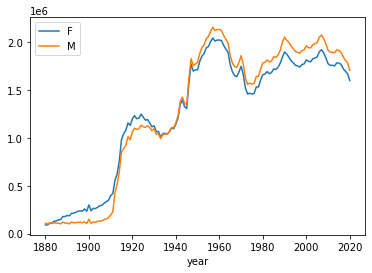

In [5]:
df.plot()

In [6]:
babyNames.groupby(["year"]).sum()

,Births
year,
1880,201484
1881,192691
1882,221533
1883,216944
1884,243461
...,...
2016,3662277
2017,3568294
2018,3505963


In [20]:
def add_popName(popular_name):
    popular_name['popular_name']=((popular_name.Births/popular_name.Births.sum())*100)
    return popular_name

babyNames = babyNames.groupby(['year','Gender']).apply(add_popName)
babyNames

,Name,Gender,Births,year,popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2020858,Zykell,M,5,2020,0.000293
2020859,Zylus,M,5,2020,0.000293
2020860,Zymari,M,5,2020,0.000293
2020861,Zyn,M,5,2020,0.000293


In [29]:
def top_name(popular_name):
    return popular_name.sort_values(by='Births',ascending=False)[:100]
pop_name = babyNames.groupby(['Gender','Births'])
top_100 = pop_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [30]:
boyNames = top_100[top_100["Gender"] == 'M']
girlNames = top_100[top_100["Gender"] == 'F']

In [31]:
boyNames.head()

,Name,Gender,Births,year,popular_name
94983,Ab,M,5,1880,0.004525
94984,Si,M,5,2001,0.000257
94985,Slader,M,5,2001,0.000257
94986,Sladen,M,5,2001,0.000257
94987,Skylur,M,5,2001,0.000257


In [32]:
girlNames.head()

,Name,Gender,Births,year,popular_name
0,Adelle,F,5,1880,0.005495
1,Constanza,F,5,2000,0.000275
2,Coralyn,F,5,2000,0.000275
3,Corayma,F,5,2000,0.000275
4,Corbyn,F,5,2000,0.000275
